## Understanding the factors that drive business success is essential for stakeholders. This project leverages the Yelp dataset to explore the correlation between user engagement (including reviews, tips, and check-ins) and key success indicators for restaurants, such as review counts and ratings.

### Research Objectives:

(a). Measure the relationship between user engagement (reviews, tips, check-ins) and business success indicators, including review count and average star rating. This will help us determine if restaurants with higher user engagement experience a corresponding increase in reviews and ratings.

(b). Examine how review sentiment affects both review count and average star rating. This will help us determine if positive sentiment in reviews and tips translates to higher star ratings.

(c). Investigate time-based trends in user engagement patterns. This will help us determine if consistent user engagement over time is a stronger indicator of long-term success compared to sporadic bursts of activity.

### Based on the research objectives, there are three hypothesis:

(a). Increased user engagement, such as higher number of reviews, tips, and check-ins, is linked to greater review counts and higher restaurant ratings.

(b). Positive sentiment in reviews and tips leads to higher overall ratings and increased review counts of restaurants.

(c). Steady engagement overtime is positively correlated with long-term business success for restaurants.

### Data Overview:

• This dataset is a subset of Yelp, containing information on businesses from eight metropolitan areas across the USA and Canada.

• The original data is provided by Yelp in JSON format.

• The five JSON files include business, review, user, tip, and check-in data.

• The JSON files are stored in a database to facilitate easy data retrieval.

### STEPS:-

1. Downloading Yelp dataset
https://www.yelp.com/dataset

2. Database Creation file
(a). Opened all JSON files one-by-one. (b). Loaded them with json.loads (c). And then converted them into data frames (d). Created sqlite engine yelp.db to create database (e). Transferring all the data frames to the yelp.db database by storing them into five different tables.

3. Analysis and Findings

## Importing Libraries

In [1]:
import pandas as pd                         # For data manipulation and analysis, especially with tabular data.
import matplotlib.pyplot as plt             # For creating static visualizations like plots and graphs.
import seaborn as sns                       # For statistical data visualization, built on top of matplotlib.
from datetime import datetime               # For working with dates and times.
import numpy as np                          # For numerical operations, including arrays and mathematical functions.
import folium                               # For creating interactive maps with geospatial data.
from geopy.geocoders import Nominatim       # For converting addresses into geographic coordinates (geocoding).
from matplotlib.colors import LinearSegmentedColormap  # For creating custom colormaps in visualizations.
from IPython.display import display         # For displaying rich outputs in Jupyter notebooks (like DataFrames).
import warnings                             # For controlling warning messages in Python.
warnings.filterwarnings('ignore')           # To suppress warnings for cleaner outputs.


### Database Connection

In [2]:
import mysql.connector

db = mysql.connector.connect(
    host='localhost',
    user='root',
    password='S@urabh13',
    database='yelp')

cur = db.cursor()

In [4]:
# Selecting all the table names from the database.
tables = pd.read_sql_query("SELECT table_name FROM information_schema.tables WHERE table_schema = 'yelp'", db)

# Display the tables
print(tables)

  TABLE_NAME
0   business
1    checkin
2     review
3        tip
4       user


There are 5 tables

### Exploring what type of data available in the tables

In [5]:
for table in tables['TABLE_NAME']:
    print(f"Table: {table}")
    display(pd.read_sql_query(f"select * from {table} limit 5", db))

Table: business


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop..."
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,"Shipping Centers, Local Services, Notaries, Ma..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"Department Stores, Shopping, Fashion, Home & G..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"Brewpubs, Breweries, Food"


Table: checkin


,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,2020-03-13 21:10:56
1,---kPU91CF4Lq2-WlRu9Lw,2020-06-02 22:18:06
2,---kPU91CF4Lq2-WlRu9Lw,2020-07-24 22:42:27
3,---kPU91CF4Lq2-WlRu9Lw,2020-10-24 21:36:13
4,---kPU91CF4Lq2-WlRu9Lw,2020-12-09 21:23:33


Table: review


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


Table: tip


,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


Table: user


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
1,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
2,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0
3,cxuxXkcihfCbqt5Byrup8Q,Rob,12,2009-02-24 03:09:06,6,1,0,,"HDAQ74AEznP-YsMk1B14CA, 6A6-aIX7fg_zRy9MiE6YyQ...",1,...,0,0,0,0,0,1,0,0,0,0
4,E9kcWJdJUHuTKfQurPljwA,Mike,358,2008-12-11 22:11:56,399,102,143,,"y2GyxJF5VQWohxgw_GR7Jw, 0NRn4eY3JWN0IFqvOSa5gA...",23,...,7,2,0,0,8,6,12,12,5,0


### Data Analysis

In [6]:
# Unique Businesses
pd.read_sql_query("select count(*) from business",db)

,count(*)
0,150346


In [7]:
# Open restaurant businesses

business_id = pd.read_sql_query("""select business_id, review_count
                                   from business
                                   where lower(categories) like '%restaurants%'
                                   and is_open = 1""", db)

business_id

,business_id,review_count
0,MTSW4McQd7CbVtyjqoe9mw,80
1,CF33F8-E6oudUQ46HnavjQ,6
2,bBDDEgkFA1Otx9Lfe7BZUQ,10
3,eEOYSgkmpB90uNA7lDOMRA,10
4,il_Ro8jwPlHresjw9EGmBg,28
...,...,...
34982,w_4xUt-1AyY2ZwKtnjW0Xg,998
34983,l9eLGG9ZKpLJzboZq-9LRQ,11
34984,cM6V90ExQD6KMSU3rRB5ZA,33
34985,WnT9NIzQgLlILjPT0kEcsQ,35


In [66]:
business_id.shape

(34987, 2)

So, out of 150346, approximately 35K are restaurants which are open.

### To get the business score, review count and star rating are two most important variables
### Descriptive stats for review count and star rating for businesses

In [83]:
# avg, min, max, median

basic_stats_query = f"""
    SELECT 
        AVG(review_count) AS avg_review_count, 
        MIN(review_count) AS min_review_count, 
        MAX(review_count) AS max_review_count,
        AVG(stars) AS avg_star_rating,
        MIN(stars) AS min_star_rating,
        MAX(stars) AS max_star_rating
    FROM business
    WHERE business_id IN {tuple(business_id['business_id'])}
"""

basic_stats = pd.read_sql_query(basic_stats_query, db)


This part {tuple(business_id['business_id'])} seems to be placeholder for dynamically generating a list of business_ids. We are extracting a list or tuple of business_id values from it. The IN clause filters results where business_id matches any value in the list of business_ids.

In [84]:
basic_stats

,avg_review_count,min_review_count,max_review_count,avg_star_rating,min_star_rating,max_star_rating
0,55.9994,5,248,3.477173,1.0,5.0


### Calculate Median for review_count and stars
You’ll need two separate queries to handle the median calculation.

For Median Calculation:

Fetch Total Row Count:

In [85]:
# Calculate total number of rows
total_rows_query = f"""
    SELECT COUNT(*) AS total_rows
    FROM business
    WHERE business_id IN {tuple(business_id['business_id'])}
"""
total_rows = pd.read_sql_query(total_rows_query, db).iloc[0, 0]


In [86]:
total_rows

31520

### Median Calculation Queries:
For Odd Number of Rows:

In [87]:
# Median for review_count
if total_rows % 2 == 0:
    median_query_review_count = f"""
        SELECT AVG(review_count) AS median_review_count
        FROM (
            SELECT review_count
            FROM business
            WHERE business_id IN {tuple(business_id['business_id'])}
            ORDER BY review_count
            LIMIT 2 OFFSET {total_rows // 2 - 1}
        ) AS median_values
    """
else:
    median_query_review_count = f"""
        SELECT review_count AS median_review_count
        FROM business
        WHERE business_id IN {tuple(business_id['business_id'])}
        ORDER BY review_count
        LIMIT 1 OFFSET {total_rows // 2}
    """

median_review_count = pd.read_sql_query(median_query_review_count, db)


In [88]:
median_review_count

,median_review_count
0,33.0


- Max Review count is 248
- Median Review count is 33

If it were such as 7000 something review counts and 15 median counts, then we could have said that some restaurants review counts are very high. It would have affected our normal analysis because of these outliers.

### For Median Star Rating:

In [89]:
# Median for star rating
if total_rows % 2 == 0:
    median_query_star_rating = f"""
        SELECT AVG(stars) AS median_star_rating
        FROM (
            SELECT stars
            FROM business
            WHERE business_id IN {tuple(business_id['business_id'])}
            ORDER BY stars
            LIMIT 2 OFFSET {total_rows // 2 - 1}
        ) AS median_values
    """
else:
    median_query_star_rating = f"""
        SELECT stars AS median_star_rating
        FROM business
        WHERE business_id IN {tuple(business_id['business_id'])}
        ORDER BY stars
        LIMIT 1 OFFSET {total_rows // 2}
    """

median_star_rating = pd.read_sql_query(median_query_star_rating, db)


In [90]:
median_star_rating

,median_star_rating
0,3.5


In [91]:
# Combine results
print("Basic Statistics:")
print(basic_stats)

print("Median Review Count:")
print(median_review_count)

print("Median Star Rating:")
print(median_star_rating)


Basic Statistics:
   avg_review_count  min_review_count  max_review_count  avg_star_rating  \
0           55.9994                 5               248         3.477173   

   min_star_rating  max_star_rating  
0              1.0              5.0  
Median Review Count:
   median_review_count
0                 33.0
Median Star Rating:
   median_star_rating
0                 3.5


In [92]:
# 5. Combine Results
combined_results = basic_stats.copy()
combined_results['median_review_count'] = median_review_count['median_review_count'].values[0]
combined_results['median_star_rating'] = median_star_rating['median_star_rating'].values[0]

print("Combined Statistics:")
print(combined_results)

Combined Statistics:
   avg_review_count  min_review_count  max_review_count  avg_star_rating  \
0           55.9994                 5               248         3.477173   

   min_star_rating  max_star_rating  median_review_count  median_star_rating  
0              1.0              5.0                 33.0                 3.5  


In [93]:
# Transpose the combined results
transposed_results = combined_results.T

print("Transposed Statistics:")
print(transposed_results)

Transposed Statistics:
                              0
avg_review_count      55.999400
min_review_count       5.000000
max_review_count     248.000000
avg_star_rating        3.477173
min_star_rating        1.000000
max_star_rating        5.000000
median_review_count   33.000000
median_star_rating     3.500000


In [59]:
# Defining function for outliers:

#def remove_outliers(df, col):
 #   q1 = df[col].quantile(0.25)
  #  q3 = df[col].quantile(0.75)
   # iqr = q3 - q1
    #lower_bound = q1 - 1.5 * iqr
    #upper_bound = q3 - 1.5 * iqr
    #df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    #return df

In [78]:
#def remove_outliers_custom(df, col, upper_limit):
    # Set custom bounds for outliers
 #   df_filtered = df[df[col] <= upper_limit]
  #  return df_filtered

# usage
#upper_limit = 248
# business_id = remove_outliers_custom(business_id, 'review_count', upper_limit)


In [44]:
#business_id = remove_outliers(business_id, 'review_count')

In [79]:
business_id.shape

(31520, 2)

In [94]:
print(business_id['review_count'].max())  # Should give a value close to 248


248


### Which restaurants have the highest total number of reviews?

In [96]:
pd.read_sql_query(f"""select name, 
                      sum(review_count) as review_count,
                      avg(stars) as avg_rating
                      from business
                      where business_id in {tuple(business_id['business_id'])}
                      group by name
                      order by review_count desc
                      limit 10""",db)

,name,review_count,avg_rating
0,McDonald's,16490.0,1.868702
1,Chipotle Mexican Grill,9071.0,2.381757
2,Taco Bell,8017.0,2.141813
3,Chick-fil-A,7711.0,3.369427
4,First Watch,6761.0,3.875000
5,Panera Bread,6613.0,2.661905
6,Buffalo Wild Wings,6483.0,2.344828
7,Domino's Pizza,6091.0,2.290210
8,Wendy's,5930.0,2.030159
9,Chili's,5754.0,2.500000


### Which restaurants have the highest ratings?


In [97]:
pd.read_sql_query(f"""select name, 
                      sum(review_count) as review_count,
                      avg(stars) as avg_rating
                      from business
                      where business_id in {tuple(business_id['business_id'])}
                      group by name
                      order by avg_rating desc
                      limit 10""",db)

,name,review_count,avg_rating
0,Fevzi's Mediterranean Grill,14.0,5.0
1,Open Hands,5.0,5.0
2,American Express century and lounge,5.0,5.0
3,3rd Rock Tavern,5.0,5.0
4,Oat Bakery,123.0,5.0
5,Jet City Espresso Hyde Park,152.0,5.0
6,Celtica French Bakery,29.0,5.0
7,In and Out Express Food Market,5.0,5.0
8,Undergrowth Coffee,20.0,5.0
9,Restaurant Ambra,61.0,5.0


From this study, we can say that there are restaurants that have higher review count but very less average rating. On the other hand, there are some restaurants that very few review count but higher average ratings. 

From customer point view, preference is given to restaurants that have both higher review count and higher average rating. 

### Do Restaurants with higher engagement tend to have higher ratings? or Is there any correlation?

In [99]:
pd.read_sql_query("""Select * from checkin""",db)

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,2020-03-13 21:10:56
1,---kPU91CF4Lq2-WlRu9Lw,2020-06-02 22:18:06
2,---kPU91CF4Lq2-WlRu9Lw,2020-07-24 22:42:27
3,---kPU91CF4Lq2-WlRu9Lw,2020-10-24 21:36:13
4,---kPU91CF4Lq2-WlRu9Lw,2020-12-09 21:23:33
...,...,...
13356870,zzu6_r3DxBJuXcjnOYVdTw,2013-12-11 00:52:49
13356871,zzu6_r3DxBJuXcjnOYVdTw,2013-12-13 00:58:14
13356872,zzw66H6hVjXQEt0Js3Mo4A,2016-12-03 23:33:26
13356873,zzw66H6hVjXQEt0Js3Mo4A,2018-12-02 19:08:45


In [101]:
pd.read_sql_query("""Select business_id, count(date) 
                     from checkin
                     group by business_id""", db)


,business_id,count(date)
0,---kPU91CF4Lq2-WlRu9Lw,11
1,--0iUa4sNDFiZFrAdIWhZQ,10
2,--30_8IhuyMHbSOcNWd6DQ,2
3,--7PUidqRWpRSpXebiyxTg,10
4,--7jw19RH9JKXgFohspgQw,26
...,...,...
131925,zznJox6-nmXlGYNWgTDwQQ,67
131926,zznZqH9CiAznbkV6fXyHWA,1
131927,zzu6_r3DxBJuXcjnOYVdTw,23
131928,zzw66H6hVjXQEt0Js3Mo4A,2


In [102]:
pd.read_sql_query("""Select business_id, 
                     count(*) as checkin_count
                     from checkin
                     group by business_id""", db)


,business_id,checkin_count
0,---kPU91CF4Lq2-WlRu9Lw,11
1,--0iUa4sNDFiZFrAdIWhZQ,10
2,--30_8IhuyMHbSOcNWd6DQ,2
3,--7PUidqRWpRSpXebiyxTg,10
4,--7jw19RH9JKXgFohspgQw,26
...,...,...
131925,zznJox6-nmXlGYNWgTDwQQ,67
131926,zznZqH9CiAznbkV6fXyHWA,1
131927,zzu6_r3DxBJuXcjnOYVdTw,23
131928,zzw66H6hVjXQEt0Js3Mo4A,2


Business_id's checkin count

In [103]:
pd.read_sql_query("""Select * from tip""",db)

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0
...,...,...,...,...,...
908910,eYodOTF8pkqKPzHkcxZs-Q,3lHTewuKFt5IImbXJoFeDQ,Disappointed in one of your managers.,2021-09-11 19:18:57,0
908911,1uxtQAuJ2T5Xwa_wp7kUnA,OaGf0Dp56ARhQwIDT90w_g,Great food and service.,2021-10-30 11:54:36,0
908912,v48Spe6WEpqehsF2xQADpg,hYnMeAO77RGyTtIzUSKYzQ,Love their Cubans!!,2021-11-05 13:18:56,0
908913,ckqKGM2hl7I9Chp5IpAhkw,s2eyoTuJrcP7I_XyjdhUHQ,Great pizza great price,2021-11-20 16:11:44,0


In [104]:
pd.read_sql_query("""Select business_id,
                     count(*) as tip_count
                     from tip
                     group by business_id""",db)

,business_id,tip_count
0,3uLgwr0qeCNMjKenHJwPGQ,46
1,QoezRbYQncpRqyrLH6Iqjg,54
2,MYoRNLb5chwjQe3c_k37Gg,1
3,hV-bABTK-glh5wj31ps_Jw,5
4,_uN0OudeJ3Zl_tf6nxg5ww,23
...,...,...
106188,iJ2DouXcIs0NwM9EdGlDZQ,1
106189,TIdijYW7GmQjeXAcf0ehBQ,1
106190,GzLCbUdoyIrkCVK4vB5NOQ,1
106191,0Ub8i_sMIOsa0jbXNzsl8A,1


In [113]:
review_count_df =pd.read_sql_query(f"""
select total.avg_rating as rating,
       avg(total.review_count) as avg_review_count,
       avg(total.checkin_count) as avg_checkin_count,
        avg(total.tip_count) as avg_tip_count
from
(select 
    b.business_id,
    sum(b.review_count) as review_count,
    avg(b.stars) as avg_rating,
    count(cc.date) as checkin_count,
    sum(tip.tip_count) as tip_count
from
    business b
left join
    checkin cc
on b.business_id = cc.business_id
left join
    (Select business_id,
            count(*) as tip_count
            from tip
            group by business_id
            order by tip_count) as tip
on b.business_id = tip.business_id
where b.business_id IN {tuple(business_id['business_id'])}
group by b.business_id) as total
group by total.avg_rating
order by total.avg_rating""", db)


# pd.read_sql_query("""Select business_id, count(date) from checkin  group by business_id""", db)


#pd.read_sql_query("""Select business_id, count(*) as tip_count from tip group by business_id""",db)

In [114]:
review_count_df

,rating,avg_review_count,avg_checkin_count,avg_tip_count
0,1.0,467.1693,15.3862,108.5630
1,1.5,1450.5218,33.3836,266.1093
2,2.0,3054.4041,51.2392,584.7068
3,2.5,6192.9305,78.3020,1292.2710
4,3.0,9923.4799,104.6342,2052.2030
5,3.5,14606.7700,124.6924,2866.0103
6,4.0,16614.1457,125.9899,3238.1690
7,4.5,10933.7025,85.1534,1920.4610
8,5.0,2306.1113,25.8684,400.6088


So, for every rating, we have got avg_review_count, avg_checkin_count, avg_tip_count.

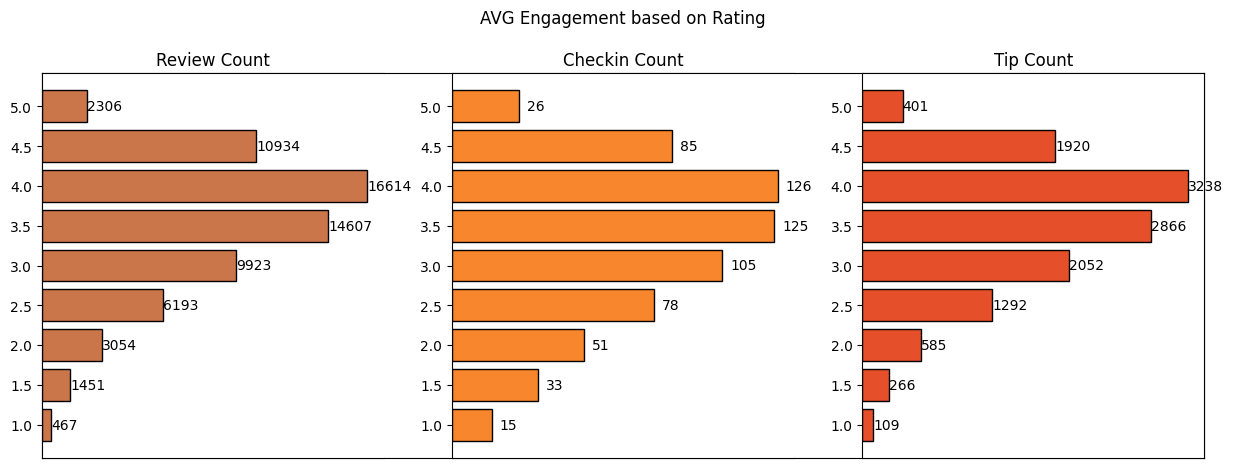

In [115]:
# Plotting horizontal bar graph
plt.figure(figsize=(15,5))
plt.title('AVG Engagement based on Rating\n\n')
plt.yticks([])
plt.xticks([])

# Subplot 1: Review Count
plt.subplot(1, 3, 1) # (rows, columns, position(first subplot)
plt.title('Review Count')
plt.barh(review_count_df['rating'].astype('str'), review_count_df['avg_review_count'], edgecolor = 'k', color = '#CB754B')
plt.gca().spines['right'].set_visible(False)
for i, value in enumerate(review_count_df['avg_review_count']):
    plt.text(value + 3, i, str(round(value)), color='black', va='center')

plt.xticks([])

# Subplot 2: Checkin Count
plt.subplot(1, 3, 2)
plt.title('Checkin Count')
plt.barh(review_count_df['rating'].astype('str'), review_count_df['avg_checkin_count'], edgecolor = 'k', color = '#F8862C')
plt.gca().spines['right'].set_visible(False)
for i, value in enumerate(review_count_df['avg_checkin_count']):
    plt.text(value + 3, i, str(round(value)), color='black', va='center')

plt.xticks([])

# Subplot 3: Tip Count
plt.subplot(1, 3, 3)
plt.title('Tip Count')
plt.barh(review_count_df['rating'].astype('str'), review_count_df['avg_tip_count'], edgecolor = 'k', color = '#E54F29')
for i, value in enumerate(review_count_df['avg_tip_count']):
    plt.text(value + 0.05, i, str(round(value)), color='black', va='center')

plt.xticks([])

plt.show()


- Trend is in increasing order
- As business engagement increases (review count, checkin count, tip count), the rating count also increases but at a  particular threshold. Suppose here we can consider threshold as 4 (rating) for a business to be succesfull as it shows an increasing trend till 4. So, the business needs to maintain their rating till 4.0. However, businesses can consider their own threshold but above all rating 4.0 is best in relation to increasing trend. 

### Is there a correlation between the number of reviews, tips, and check-ins for a business?

In [116]:
engagement_df =pd.read_sql_query(f"""select 
    b.business_id,
    sum(b.review_count) as review_count,
    avg(b.stars) as avg_rating,
    count(cc.date) as checkin_count,
    sum(tip.tip_count) as tip_count
from
    business b
left join
    checkin cc
on b.business_id = cc.business_id
left join
    (Select business_id,
            count(*) as tip_count
            from tip
            group by business_id
            order by tip_count) as tip
on b.business_id = tip.business_id
where b.business_id IN {tuple(business_id['business_id'])}
group by b.business_id""", db).dropna()




In [117]:
engagement_df

,business_id,review_count,avg_rating,checkin_count,tip_count
0,8P5wSj-51aqqc-jC31RK9g,345.0,4.0,15,15.0
1,OWZvM6hrLciRv2VwZOS3uw,60.0,4.5,4,4.0
2,Q2ovEKNEIarxX67c9u2mIA,120.0,5.0,8,8.0
3,X1aAjsufci2ibaxSbhFl4Q,2193.0,4.5,43,43.0
4,_j8KJ7muz3hBGBN8RLCpOw,51.0,3.5,3,3.0
...,...,...,...,...,...
31504,UA3HxLprLSOO9J6l1iR2Cg,76260.0,3.5,372,15624.0
31508,fei9rruZ08-jy2pRz_0fNw,92530.0,4.0,487,22889.0
31510,jLuV-vRpLZLGNE4NiXXY1Q,272600.0,4.0,1175,50525.0
31512,ljBjU43MhcFgoJsH9Xcj7w,20860.0,4.0,298,22946.0


In [118]:
engagement_df[['review_count', 'checkin_count', 'tip_count']].corr()

,review_count,checkin_count,tip_count
review_count,1.000000,0.904120,0.821267
checkin_count,0.904120,1.000000,0.781226
tip_count,0.821267,0.781226,1.000000


<Axes: >

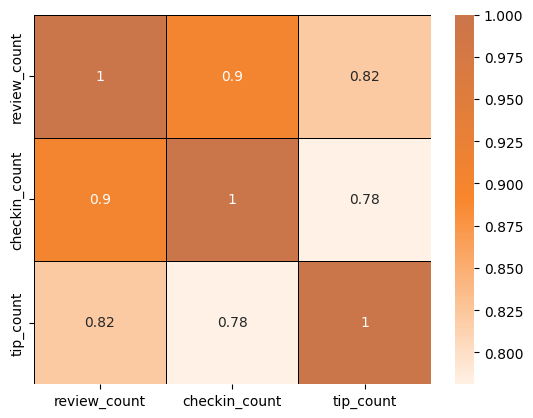

In [119]:
colors = ['#FFF1E5', '#F8862C', '#CB754B']
custom_cmap = LinearSegmentedColormap.from_list("mymap", colors)
sns.heatmap(engagement_df[['review_count', 'checkin_count', 'tip_count']].corr(), 
            cmap=custom_cmap, annot=True, linewidths=0.5, linecolor='black')


Yes, based on the correlation matrix shown in the image, there is a **strong positive correlation** between the number of reviews (`review_count`), the number of check-ins (`checkin_count`), and the number of tips (`tip_count`) for a business.

### Key potsix:
- The correlation between `review_count` and `checkin_count` is **0.904**, which indicates a very strong positive correlation. This means businesses with more reviews tend to have more check-ins.
- The correlation between `review_count` and `tip_count` is **0.821**, also a strong positive correlation, suggesting that businesses with more reviews tend to receive more tips.
- The correlation between `checkin_count` and `tip_count` is **0.781**, which is also strong, indicating that businesses with more check-ins tend to receive more tid tips).

### Is there a difference in the user engagement (reviews, tips, and check-ins) between high-rated and low-rated businesses?

In [125]:
diff_high_low_engagement = pd.read_sql_query(f"""select 
    b.business_id,
    sum(b.review_count) as review_count,
    avg(b.stars) as avg_rating,
    count(cc.date) as checkin_count,
    sum(tip.tip_count) as tip_count,
    (CASE WHEN avg(b.stars) >= 3.5 Then 'High-Rated' Else 'Low-Rated' End) as category
from
    business b
left join
    checkin cc
on b.business_id = cc.business_id
left join
    (Select business_id,
            count(*) as tip_count
    from tip
    group by business_id) as tip
    on b.business_id = tip.business_id
    where b.business_id IN {tuple(business_id['business_id'])}
group by b.business_id""", db).dropna()




In [ ]:
# diff_high_low_engagement

In [127]:
diff_high_low_engagement.groupby("category")[['review_count','tip_count', 'checkin_count']].mean()

,review_count,tip_count,checkin_count
category,,,
High-Rated,15326.992694,2665.692601,121.421133
Low-Rated,7470.119223,1347.913589,88.286664


In high-rated restaurant engagement is high in relation to low-rated restaurant.

### How do the success metrics (review_count or avg_rating) of restaurants vary across different states and cities?

In [128]:
# function to calculate the success score based on the avg rating and total review count
def calculate_success_metric(df):
    success_score = []
    for index, row in df.iterrows():
        score = row['avg_rating'] * np.log(row['review_count'] + 1)
        success_score.append(score)
    return success_score

In [ ]:
pd.read_sql_query(f"""
    SELECT city, 
           state, 
           AVG(latitude) AS avg_latitude, 
           AVG(longitude) AS avg_longitude, 
           AVG(stars) AS avg_rating,
           SUM(review_count) AS review_count,
           COUNT(*) AS restaurant_count
    FROM business
    WHERE business_id IN {tuple(business_id['business_id'])}
    GROUP BY state, city
    ORDER BY review_count DESC
    LIMIT 10
""", db)

In [135]:
city_df = pd.read_sql_query(f"""
    SELECT city, 
           state, 
           AVG(latitude) AS avg_latitude, 
           AVG(longitude) AS avg_longitude, 
           AVG(stars) AS avg_rating,
           SUM(review_count) AS review_count,
           COUNT(*) AS restaurant_count
    FROM business
    WHERE business_id IN {tuple(business_id['business_id'])}
    GROUP BY state, city
    ORDER BY review_count DESC
    LIMIT 10
""", db)

city_df['success_score'] = calculate_success_metric(city_df)

In [136]:
city_df

,city,state,avg_latitude,avg_longitude,avg_rating,review_count,restaurant_count,success_score
0,Philadelphia,PA,39.982246,-75.150070,3.532167,175589.0,3000,42.654116
1,Tampa,FL,28.001704,-82.476982,3.568023,104743.0,1720,41.243760
2,Indianapolis,IN,39.802349,-86.141398,3.412111,92639.0,1701,39.022521
3,Tucson,AZ,32.233967,-110.936353,3.383204,91621.0,1417,38.654549
4,Nashville,TN,36.142252,-86.770107,3.491465,87100.0,1406,39.714800
5,New Orleans,LA,29.961249,-90.075342,3.693676,69303.0,1012,41.170664
6,Saint Louis,MO,38.616306,-90.302724,3.412963,51482.0,810,37.027259
7,Reno,NV,39.507566,-119.806503,3.478778,48516.0,589,37.534861
8,Edmonton,AB,53.526310,-113.514226,3.509367,45986.0,1548,37.676963
9,Boise,ID,43.608500,-116.239144,3.558140,36087.0,559,37.338105


In [139]:
import folium

# Create a base map
m = folium.Map(location=[city_df['avg_latitude'].mean(), city_df['avg_longitude'].mean()], zoom_start=4)

# Define a color scale
color_scale = folium.LinearColormap(colors=['green', 'yellow', '#E54F29'],
                                    vmin=city_df['success_score'].min(),
                                    vmax=city_df['success_score'].max())

# Add markers to the map
for index, row in city_df.iterrows():
    folium.CircleMarker(
        location=[row['avg_latitude'], row['avg_longitude']],
        radius=5,
        color=color_scale(row['success_score']),
        fill=True,
        fill_color=color_scale(row['success_score']),
        fill_opacity=0.7,
        popup=f"Success Score: {row['success_score']}"
    ).add_to(m)

# Add color scale to the map
m.add_child(color_scale)

What does it signify?

It signifies that if restaurants are open in these cities, there higher chances of sucess for these restaurants.

### Are there any patterns in user engagement over time for successful businesses compared to less successful ones? 
### Are there any seasonal trends in the user engagement for restaurants?

In [143]:
pd.read_sql_query(f""" select DATE_FORMAT(date, '%m-%Y') as month_year, 
                              count(*) as review_count
                              from review
                              where business_id IN {tuple(business_id['business_id'])} and stars >= 3.5
                              group by month_year
                              order by month_year""",db)

,month_year,review_count
0,01-2006,30
1,01-2007,83
2,01-2008,193
3,01-2009,663
4,01-2010,1218
...,...,...
197,12-2017,10158
198,12-2018,12870
199,12-2019,13754
200,12-2020,11293


In [145]:
pd.read_sql_query(f""" select avg(b.stars), 
                              DATE_FORMAT(tip.date, '%m-%Y') as month_year,
                              count(*) as tip_count
                              from tip
                              join business as b
                              on tip.business_id = b.business_id
                              where tip.business_id IN {tuple(business_id['business_id'])} and stars >= 3.5
                              group by month_year
                              order by month_year""",db)

,avg(b.stars),month_year,tip_count
0,3.822785,01-2010,79
1,3.809179,01-2011,621
2,3.834595,01-2012,1321
3,3.839431,01-2013,1230
4,3.876106,01-2014,1356
...,...,...,...
149,4.000339,12-2017,1477
150,4.024076,12-2018,1163
151,4.077089,12-2019,1161
152,4.144077,12-2020,937


In [146]:
high_rated_engagement =  pd.read_sql_query(f""" 
select review.month_year, 
       review.review_count,
       tip.tip_count
from(
    select DATE_FORMAT(date, '%m-%Y') as month_year, 
           count(*) as review_count
    from review
    where business_id IN {tuple(business_id['business_id'])} and stars >= 3.5
    group by month_year
    order by month_year) as review
JOIN
(
    select avg(b.stars), 
           DATE_FORMAT(tip.date, '%m-%Y') as month_year,
           count(*) as tip_count
    from tip
    join business as b
    on tip.business_id = b.business_id
    where tip.business_id IN {tuple(business_id['business_id'])} and stars >= 3.5
    group by month_year
    order by month_year) as tip
on review.month_year = tip.month_year""",db)

In [147]:
high_rated_engagement

,month_year,review_count,tip_count
0,01-2010,1218,79
1,01-2011,2171,621
2,01-2012,3086,1321
3,01-2013,3801,1230
4,01-2014,4971,1356
...,...,...,...
149,12-2017,10158,1477
150,12-2018,12870,1163
151,12-2019,13754,1161
152,12-2020,11293,937


In [148]:
low_rated_engagement =  pd.read_sql_query(f""" 
select review.month_year, 
       review.review_count,
       tip.tip_count
from(
    select DATE_FORMAT(date, '%m-%Y') as month_year, 
           count(*) as review_count
    from review
    where business_id IN {tuple(business_id['business_id'])} and stars < 3.5
    group by month_year
    order by month_year) as review
JOIN
(
    select avg(b.stars), 
           DATE_FORMAT(tip.date, '%m-%Y') as month_year,
           count(*) as tip_count
    from tip
    join business as b
    on tip.business_id = b.business_id
    where tip.business_id IN {tuple(business_id['business_id'])} and stars < 3.5
    group by month_year
    order by month_year) as tip
on review.month_year = tip.month_year""",db)

In [149]:
low_rated_engagement

,month_year,review_count,tip_count
0,01-2010,613,25
1,01-2011,1103,297
2,01-2012,1748,538
3,01-2013,2196,548
4,01-2014,2768,607
...,...,...,...
149,12-2017,5970,441
150,12-2018,7574,338
151,12-2019,7590,275
152,12-2020,5013,148


### Every month what is the rating of all the businesses

In [150]:
time_rating = pd.read_sql_query(f"""select DATE_FORMAT(date, '%m-%Y') as month_year,
                                           avg(stars) as avg_rating
                                    from review
                                    where business_id IN {tuple(business_id['business_id'])}
                                    group by month_year
                                    order by month_year""",db)
                                    

The `tuple(business_id['business_id'])` in your query is a way to pass multiple business IDs dynamically from a Python DataFrame (or another data structure) into the SQL query. Here's a breakdown of what's happening:

- `business_id['business_id']` refers to the `business_id` column of a Pandas DataFrame (`business_id` is a DataFrame that contains a column named `business_id`).
- `tuple(business_id['business_id'])` converts the column values into a Python tuple, which will look like this: `('id1', 'id2', 'id3', ...)`. This tuple is then used in the `IN` clause of your SQL query to select multiple business IDs.

### Alternate Query Without Using Python's `tuple` Function

If you don't want to use the dynamic tuple method, you can manually specify the `business_id` values directly in the query. For example:

```sql
SELECT DATE_FORMAT(date, '%m-%Y') AS month_year,
       AVG(stars) AS avg_rating
FROM review
WHERE business_id IN ('id1', 'id2', 'id3')  -- Manually specify business IDs here
GROUP BY month_year
ORDER BY month_year;
```

### Explanation:
- Replace `'id1', 'id2', 'id3'` with the actual business IDs that you want to query.
- This is useful if you know which business IDs you want to filter by and don’t need to fetch them dynamically from Python.

This static approach removes the need to pass the `tuple()` from Python and can be used if you're working with a known set of business IDs.

In [151]:
time_rating

,month_year,avg_rating
0,01-2006,4.000000
1,01-2007,3.897436
2,01-2008,3.603960
3,01-2009,3.690661
4,01-2010,3.724194
...,...,...
198,12-2017,3.613219
199,12-2018,3.608687
200,12-2019,3.665246
201,12-2020,3.833804


In [152]:
time_rating['month_year'] = pd.to_datetime(time_rating['month_year'])
time_rating.sort_values('month_year', inplace=True)
time_rating = time_rating[time_rating['month_year'] > '2017']

In [153]:
time_rating

,month_year,avg_rating
28,2017-02-01,3.636779
45,2017-03-01,3.641036
62,2017-04-01,3.631225
79,2017-05-01,3.632626
96,2017-06-01,3.676801
113,2017-07-01,3.671686
130,2017-08-01,3.686279
147,2017-09-01,3.630670
164,2017-10-01,3.657639
181,2017-11-01,3.678144


In [155]:
high_rated_engagement['month_year'] = pd.to_datetime(high_rated_engagement['month_year'])
high_rated_engagement.sort_values('month_year', inplace=True)
high_rated_engagement = high_rated_engagement[high_rated_engagement['month_year'] > '2017']

In [156]:
low_rated_engagement['month_year'] = pd.to_datetime(low_rated_engagement['month_year'])
low_rated_engagement.sort_values('month_year', inplace=True)
low_rated_engagement = low_rated_engagement[low_rated_engagement['month_year'] > '2017']

In [157]:
high_rated_engagement['avg_rating'] = time_rating['avg_rating'].values

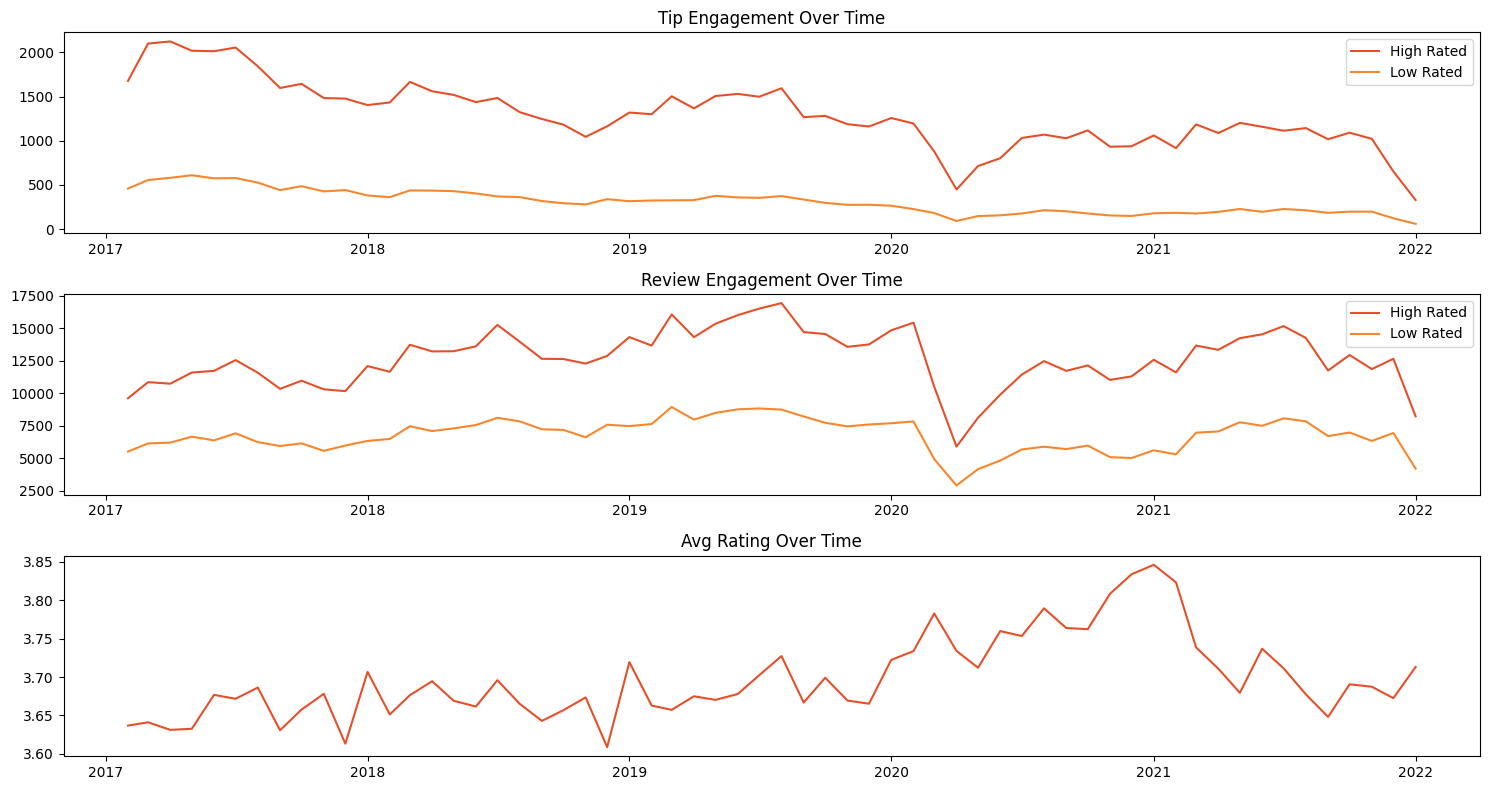

In [158]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))

# Subplot 1: Tip Engagement Over Time
plt.subplot(3, 1, 1)
plt.title('Tip Engagement Over Time')
plt.plot(high_rated_engagement['month_year'], high_rated_engagement['tip_count'], label='High Rated', color='#E54F29')
plt.plot(low_rated_engagement['month_year'], low_rated_engagement['tip_count'], label='Low Rated', color='#F8862C')
plt.legend()

# Subplot 2: Review Engagement Over Time
plt.subplot(3, 1, 2)
plt.title('Review Engagement Over Time')
plt.plot(high_rated_engagement['month_year'], high_rated_engagement['review_count'], label='High Rated', color='#E54F29')
plt.plot(low_rated_engagement['month_year'], low_rated_engagement['review_count'], label='Low Rated', color='#F8862C')
plt.legend()

# Subplot 3: Avg Rating Over Time
plt.subplot(3, 1, 3)
plt.title('Avg Rating Over Time')
plt.plot(time_rating['month_year'], time_rating['avg_rating'], color='#E54F29')

plt.tight_layout()
plt.show()

The provided image shows three line graphs that track tip engagement, review engagement, and average rating over time. The data appears to span from 2017 to 2022, and each graph includes lines representing high-rated and low-rated categories.

**Key Observations:**

* **Tip Engagement:** Both high-rated and low-rated tip engagement appear to have increased significantly between 2017 and 2019, with a slight decline in 2020. However, both lines show a steady increase from 2021 onwards.
* **Review Engagement:** Similar to tip engagement, review engagement for both high-rated and low-rated categories shows a significant increase from 2017 to 2019. In 2020, there's a noticeable dip in review engagement, especially for low-rated reviews. From 2021, review engagement starts to recover, with a more pronounced increase in high-rated reviews.
* **Average Rating:** The average rating shows a slight upward trend from 2017 to 2019. In 2020, there's a noticeable dip in the average rating. From 2021, the average rating starts to recover and reaches its highest point in 2022.

**Inferences:**

* **COVID-19 Impact:** The dip in both engagement metrics and average rating in 2020 aligns with the COVID-19 pandemic. This suggests that the pandemic had a significant impact on the business or service being analyzed.
* **Recovery and Growth:** The increase in engagement and average rating after 2020 indicates that the business or service has recovered from the pandemic and is experiencing growth.
* **Customer Satisfaction:** The overall upward trend in average rating suggests that customer satisfaction has been improving over time.
* **High-Rated Engagement:** The consistent increase in high-rated engagement metrics suggests that the business or service is effectively addressing customer needs and providing positive experiences.
* **Low-Rated Feedback:** The decline in low-rated reviews after 2020 might indicate that the business has implemented strategies to improve its performance and address custfinitive conclusions.


### How does the sentiment of reviews and tips (useful, funny, cool) correlate with the success metrics of restaurants?

In [160]:
pd.read_sql_query(f"""select business_id,
                             sum(useful) as useful_count,
                             sum(funny) as funny_count,
                             sum(cool) as cool_count
                       from review
                       group by business_id""",db)
       

,business_id,useful_count,funny_count,cool_count
0,XQfwVwDr-v0ZS3_CbbE5Xw,91.0,23.0,26.0
1,7ATYjTIgM3jUlt4UM3IypQ,211.0,54.0,108.0
2,YjUWPpI6HXG530lwP-fb2A,43.0,31.0,26.0
3,kxX2SOes4o-D3ZQBkiMRfA,302.0,78.0,149.0
4,e4Vwtrqf-wpJfwesgvdgxQ,32.0,10.0,17.0
...,...,...,...,...
150341,NSoT9z12S2wgJsZR-jfLRA,14.0,3.0,3.0
150342,GEcE9Nggevn_h8cOOHWeqg,11.0,0.0,3.0
150343,Tj9FmBCHd84kjAE9vcoBnw,11.0,0.0,0.0
150344,umg_M7rIoVccsxqoWAF3BA,10.0,0.0,0.0


In [166]:
sentiment_df = pd.read_sql_query(f"""select b.business_id, 
                             avg(b.stars) as avg_rating,
                             sum(b.review_count) as review_count,
                             sum(s.useful_count) as useful_count,
                             sum(s.funny_count) as funny_count,
                             sum(s.cool_count) as cool_count
                        from 
                        (                   
                        select business_id,
                               sum(useful) as useful_count,
                               sum(funny) as funny_count,
                               sum(cool) as cool_count
                       from review
                       group by business_id) as s
                       join business b
                       on b.business_id = s.business_id
                       
                       where b.business_id IN {tuple(business_id['business_id'])}
                       group by b.business_id
                       order by review_count""",db)

#sentiment_df = remove_outliers(sentiment_df, 'review_count')
#sentiment_df = remove_outliers(sentiment_df, 'useful_count')
#sentiment_df = remove_outliers(sentiment_df, 'funny_count')
#sentiment_df = remove_outliers(sentiment_df, 'cool_count')


In [167]:
sentiment_df['success_score'] = calculate_success_metric(sentiment_df)
sentiment_df

,business_id,avg_rating,review_count,useful_count,funny_count,cool_count,success_score
0,I2Yt2mJp0TJkdOnIpuOwew,3.0,5.0,3.0,4.0,1.0,5.375278
1,4OxrTuQqlqSptzDF5aJuSA,3.0,5.0,3.0,3.0,3.0,5.375278
2,uz9ZD1yBqoaAbwewhH2ZvQ,1.5,5.0,1.0,0.0,0.0,2.687639
3,dj1Fra1xlOaoszXOhPi0oA,2.0,5.0,3.0,3.0,3.0,3.583519
4,bECBfbtyRzNXlQvmBgaAcQ,3.0,5.0,3.0,2.0,1.0,5.375278
...,...,...,...,...,...,...,...
31515,BJBSwMKADtYjqFDCL3-zkw,2.0,248.0,166.0,62.0,29.0,11.034906
31516,5qmNrtr0iNyhCk6ky3c97w,3.0,248.0,179.0,37.0,21.0,16.552359
31517,7dbUShu3yTUVNhTrdnF0FQ,4.0,248.0,58.0,16.0,27.0,22.069812
31518,aOJDVHCn9iBIC33l_2HTRg,3.5,248.0,167.0,40.0,68.0,19.311085


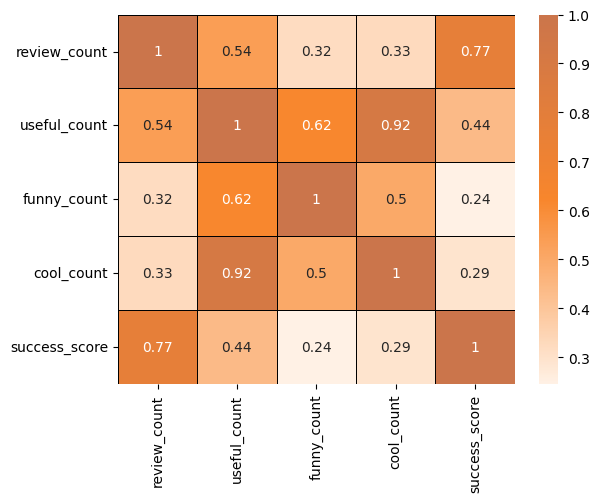

In [168]:
sns.heatmap(sentiment_df.iloc[:, 2:].corr(), cmap = custom_cmap, annot=True, linewidth=0.5, linecolor = 'black')

plt.show()

The provided heatmap is a correlation matrix that shows the relationships between different variables related to restaurant data. The variables include:

* `review_count`: The number of reviews for a restaurant
* `useful_count`: The number of times reviews were marked as useful
* `funny_count`: The number of times reviews were marked as funny
* `cool_count`: The number of times reviews were marked as cool
* `success_score`: A measure of the restaurant's overall success

**Interpreting the Correlations:**

* **Strong Positive Correlations:**
    * `useful_count` and `cool_count`: These two variables have a very strong positive correlation of 0.92, suggesting that reviews that are marked as useful are also likely to be marked as cool.
    * `review_count` and `success_score`: A strong positive correlation of 0.77 exists between these two variables, indicating that restaurants with more reviews tend to have higher success scores.

* **Moderate Positive Correlations:**
    * `review_count` and `useful_count`: There's a moderate positive correlation of 0.54 between these variables, suggesting that restaurants with more reviews are also more likely to have reviews marked as useful.
    * `review_count` and `funny_count`: A moderate positive correlation of 0.32 exists between these variables, indicating that restaurants with more reviews may also have more reviews melationships and causal mechanisms.


### Is there any difference in engagement of elite users and non-elite users?

Elite users on Yelp are considered to be more active and high-quality contributors than non-Elite users:

1. Number of reviews: Elite users write more than seven times as many reviews as the average user
2. Review quality: Elite users are known for their thoughtful, well-written reviews.
3. Photos: Elite users are known for their high-quality photos.



In [169]:
elite_df = pd.read_sql_query("""SELECT elite,
                                       count(*) as num_users,
                                       sum(review_count) as total_review_count
                                from 
                                    (select 
                                        case
                                            when elite = '' then 'Not Elite'
                                            else 'Elite'
                                        end as elite,
                                        u.review_count
                                    from 
                                        user u) as user_elite
                                    group by elite""",db)
                                    

In [170]:
elite_df

,elite,num_users,total_review_count
0,Elite,90722,19850003.0
1,Not Elite,1896646,26000871.0


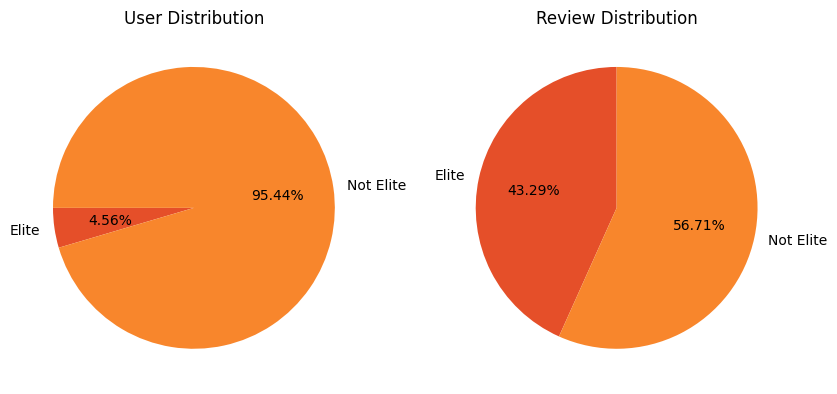

In [171]:
plt.figure(figsize=(10, 6))

# Subplot 1: User Distribution
plt.subplot(1, 2, 1)
plt.title('User Distribution')
plt.pie(elite_df['num_users'], labels=elite_df['elite'], autopct='%.2f%%', startangle=180, colors=['#E54F29', '#F8862C'])

# Subplot 2: Review Distribution
plt.subplot(1, 2, 2)
plt.title('Review Distribution')
plt.pie(elite_df['total_review_count'], labels=elite_df['elite'], autopct='%.2f%%', startangle=90, colors=['#E54F29', '#F8862C'])

plt.show()

Only 4.5% users are elite users, but elite users are very much active as given in review distribution. Elite users are contributing more towards business success by getting engaged in giving reviews and ratings.

### What are the busiest hours for restaurants?

In [173]:
# how many users engaged in that particular hour
review_engagement = pd.read_sql_query("""
select cast(DATE_FORMAT(date, '%H') as unsigned) as hour,
       count(*) as review_count
from review
group by hour;
""",db)

In [174]:
# How many tips in that particular hour
tip_engagement = pd.read_sql_query("""
select cast(DATE_FORMAT(date, '%H') as unsigned) as hour,
       count(*) as tip_count
from tip
group by hour;
""",db)

In [187]:
# Number of checkin in that particular hour
checkin_engagement = pd.read_sql_query("""
select cast(DATE_FORMAT(date, '%H') as unsigned) as hour,
       count(*) as checkin_count
from checkin
group by hour""",db)


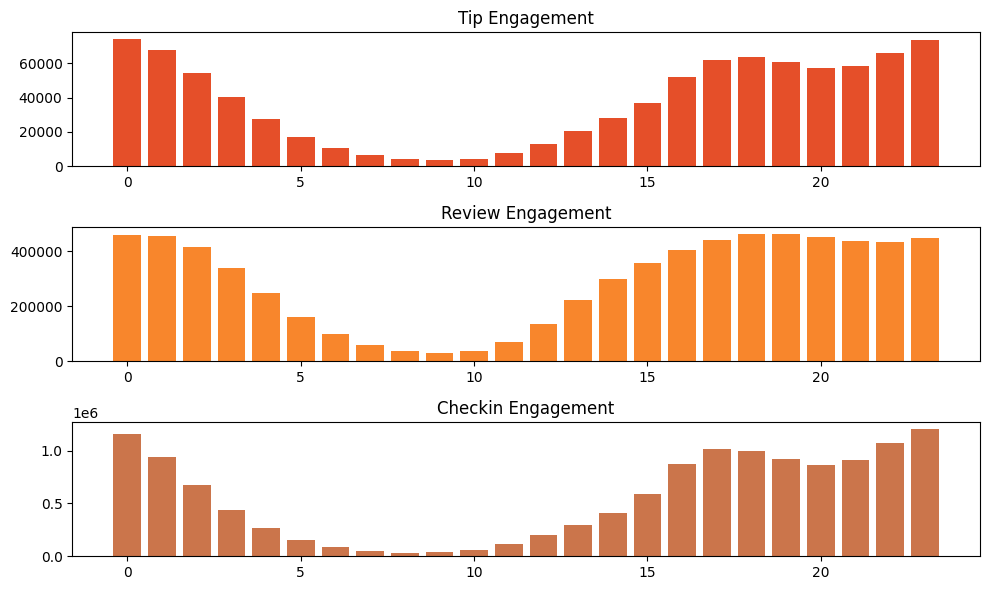

In [189]:
plt.figure(figsize=(10, 6))

# Subplot 1: Tip Engagement
plt.subplot(3, 1, 1)
plt.title('Tip Engagement')
plt.bar(tip_engagement['hour'], tip_engagement['tip_count'], color='#E54F29')

# Subplot 2: Review Engagement
plt.subplot(3, 1, 2)
plt.title('Review Engagement')
plt.bar(review_engagement['hour'], review_engagement['review_count'], color='#F8862C')

#Subplot 3: Checkin Engagement
plt.subplot(3, 1, 3)
plt.title('Checkin Engagement')
plt.bar(checkin_engagement['hour'], checkin_engagement['checkin_count'], color='#CB754B')

plt.tight_layout()
plt.show()

Engagements starts after 4 PM and remained continue till 12 AM and thereafter it decreases.